In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../CatanResults/catan_results_random.csv")

In [3]:
data = data.drop(['Fourth Player Type', 'MCTS Num Road Builder Played', 
                   'MCTS Num VP Dev Cards', 'MCTS Num Devs Bought',
                   'MCTS Total Trades Accepted', 'MCTS Trades Proposed Successfully', 
                  'MCTS Num Monopoly Played', 'MCTS Num Roads', 'MCTS Num Cities', 
                  'MCTS Num Settlements', 'Num Initial Dots Player 4', 
          'MCTS Num Ports', 'MCTS Num Knights Played', 'MCTS Num YOP Played', 
           'MCTS Total Trades Proposed', 'Fourth Player VP'], axis=1)

In [4]:
avg_num_round = data['Number Rounds'].mean()
avg_vp_p1 = data['First Player VP'].mean()
avg_vp_p2 = data['Second Player VP'].mean()
avg_vp_p3 = data['Third Player VP'].mean()
wins = data['Winner Num'].value_counts()
p1_win_rate = wins[1] / (wins[1] + wins[2] + wins[3])
p2_win_rate = wins[2] / (wins[1] + wins[2] + wins[3])
p3_win_rate = wins[3] / (wins[1] + wins[2] + wins[3])
avg_dots_to_start = (data['Num Initial Dots Player 1'].mean() + 
                     data['Num Initial Dots Player 2'].mean() + 
                     data['Num Initial Dots Player 1'].mean()) / 3


In [5]:
print(avg_vp_p1)
print(p1_win_rate)
print(data['First Player VP'].std())
print(avg_vp_p2)
print(p2_win_rate)
print(data['Second Player VP'].std())
print(avg_vp_p3)
print(p3_win_rate)
print(data['Third Player VP'].std())

6.6583
0.3381
3.007764248503665
6.6491
0.3334
2.9929024268248425
6.605
0.3285
2.9979449240065414


In [8]:
p3_vals = data['Third Player VP'].value_counts()
p2_vals = data['Second Player VP'].value_counts()
p1_vals = data['First Player VP'].value_counts()

p3 = np.asarray([p3_vals[2], p3_vals[3], p3_vals[4], p3_vals[5], p3_vals[6], \
     p3_vals[7], p3_vals[8], p3_vals[9], p3_vals[10], p3_vals[11], p3_vals[12]])
p2 = np.asarray([p2_vals[2], p2_vals[3], p2_vals[4], p2_vals[5], p2_vals[6], \
     p2_vals[7], p2_vals[8], p2_vals[9], p2_vals[10], p2_vals[11], p2_vals[12]])
p1 = np.asarray([p1_vals[2], p1_vals[3], p1_vals[4], p1_vals[5], p1_vals[6], \
     p1_vals[7], p1_vals[8], p1_vals[9], p1_vals[10], p1_vals[11], p1_vals[12]])
p3 = tuple(p3 / 10000)
p2 = tuple(p2 / 10000)
p1 = tuple(p1 / 10000)

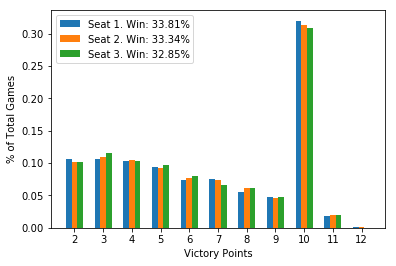

In [11]:
width = 0.2
ind = np.asarray((2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
pl1 = plt.bar(ind - width, p1, width)
pl2 = plt.bar(ind, p2, width)
pl3 = plt.bar(ind + width, p3, width)
plt.xticks(ind)
plt.xlabel('Victory Points')
plt.ylabel('% of Total Games')
plt.legend((pl1[0], pl2[0], pl3[0]), \
           ('Seat 1. Win: 33.81%', 'Seat 2. Win: 33.34%', 'Seat 3. Win: 32.85%'))
plt.show()